# Classifying Heart Disease


### Data Source
https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/ospeltz/BIOL419proj/master/heart.csv?\
token=Atx-bzOd4AGFqLjMVz169QIVrSA1IXG5ks5ce2RYwA%3D%3D'
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Visualization of Data

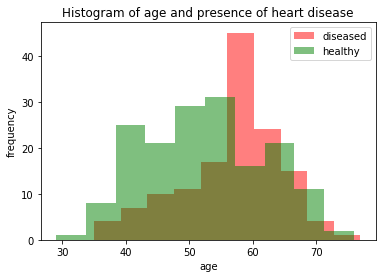

In [3]:
def hist_heart_disease(col,units=''):
  diseased = df[df['target']==0][col].values
  healthy = df[df['target']==1][col].values
  plt.hist(diseased,color='red',alpha=0.5,label='diseased')
  plt.hist(healthy,color='green',alpha=0.5,label='healthy')
  plt.legend()
  plt.xlabel(col + units)
  plt.ylabel('frequency')
  plt.title('Histogram of {} and presence of heart disease'.format(col))
  
  
hist_heart_disease('age')

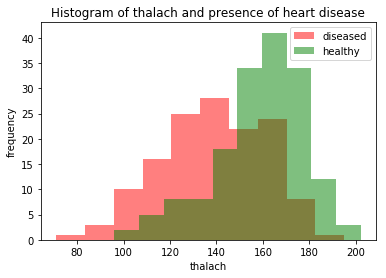

In [4]:
hist_heart_disease('thalach')

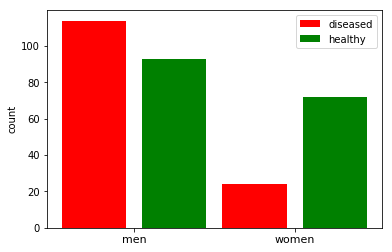

In [5]:
men = df[df['sex']==1]
women = df[df['sex']==0]
men_d = men[men['target']==0]
men_h = men[men['target']==1]
women_d = women[women['target']==0]
women_h = women[women['target']==1]
bars = plt.bar(np.arange(4),[len(men_d),len(men_h),len(women_d),len(women_h)],
        color=['r','g','r','g'])
plt.xticks([0.5,2.5],['men','women'],fontsize=11)
bars[0].set_label('diseased')
bars[1].set_label('healthy')
plt.legend()
plt.ylabel('count')
plt.show()

## Cleaning up data

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

# create a new df with no categorical variables, instead each categorical column
# is turned into multiple binary columns, one for each discrete value in a 
# categorical column
enc = OneHotEncoder(sparse=False,categories='auto')
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
clean_df = df.drop(categorical_cols,axis=1)
onehot = enc.fit_transform(df[categorical_cols])
new_cols = enc.get_feature_names(categorical_cols)
for i in range(len(new_cols)):
  clean_df[new_cols[i]] = onehot[:,i] 
  
X = clean_df.drop('target', axis=1).values
y = clean_df['target'].values

In [7]:
clean_df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37,130,250,187,3.5,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,130,204,172,1.4,1,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56,120,236,178,0.8,1,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,57,120,354,163,0.6,1,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# Returns shuffled arrays of test indices and training indices
def test_train_ids(N,frac):
  inds = np.arange(N)
  np.random.shuffle(inds)
  n = int(frac*N)
  return inds[:n], inds[n:]

In [9]:
from datetime import datetime

def cross_val_class_accuracy(model, X, y, test_Frac, reps):
    print("Cross validating model:", type(model).__name__)
    accuracy = 0;
    start_time = datetime.now()
    for i in range(reps):
        # Generate random indices for training and testing data sets
        [testing_indices, training_indices] = test_train_ids(X.shape[0], test_Frac)
        
        # Extract sets from data
        training_data = X[training_indices, :]
        testing_data = X[testing_indices, :]
        training_labels = y[training_indices]
        testing_labels = y[testing_indices]
        
        # Normalize data
        # I (Oliver) changed this because we can't really take the mean of our
        # testing data, it kind of takes away from the test
        training_mean = training_data.mean(axis=0)
        training_data = training_data - training_mean
        testing_data = testing_data - training_mean

        # Train model using training data and corresponding labels
        model.fit(training_data, training_labels)

        # Predict testing data and compare to actual data
        prediction = model.predict(testing_data)
        accuracy += sum(prediction == testing_labels) / len(testing_labels)
    cv_acc = accuracy / reps
    timediff = datetime.now() - start_time
    print("Done! (", timediff.total_seconds(), "seconds )")
    print("Accuracy:", cv_acc * 100, "%")
    print("----------------------------------")
    return cv_acc

## Cross validation accuracy of different models

Each model was trained using 80% of the data and tested using the remaining 20%.


# NEED TO SEPARATE TEST DATA

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.svm import SVC
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

# Generate models
models = [KNeighborsClassifier(n_neighbors=2), 
          KNeighborsClassifier(n_neighbors=10), 
          LinearDiscriminantAnalysis(), SVC(kernel='linear'), 
          tree.DecisionTreeClassifier(),
         LogR()]
model_names = ["KNN (N = 2)", "KNN (N = 10)", "LDA", "SVC (Linear)", "Decision Tree", "Logistic Regression"]

# Extract training/cv data
[testX, trainX] = test_train_ids(len(X), 0.2)
test_data = X[testX, :]
test_labels = y[testX]
train_data = X[trainX, :]
train_labels = y[trainX]

# Calculate accuracies for each model
result = []
for x in range(len(models)):
    model = models[x]
    values = cross_val_class_accuracy(model, train_data, train_labels, 0.2, 200)
    result = np.append(result, values)

Cross validating model: KNeighborsClassifier
Done! ( 0.214426 seconds )
Accuracy: 54.583333333333314 %
----------------------------------
Cross validating model: KNeighborsClassifier
Done! ( 0.240489 seconds )
Accuracy: 63.34375000000002 %
----------------------------------
Cross validating model: LinearDiscriminantAnalysis
Done! ( 0.357725 seconds )
Accuracy: 81.36458333333329 %
----------------------------------
Cross validating model: SVC
Done! ( 59.86589 seconds )
Accuracy: 82.69791666666664 %
----------------------------------
Cross validating model: DecisionTreeClassifier
Done! ( 0.197746 seconds )
Accuracy: 71.39583333333331 %
----------------------------------
Cross validating model: LogisticRegression
Done! ( 0.534471 seconds )
Accuracy: 84.22916666666669 %
----------------------------------


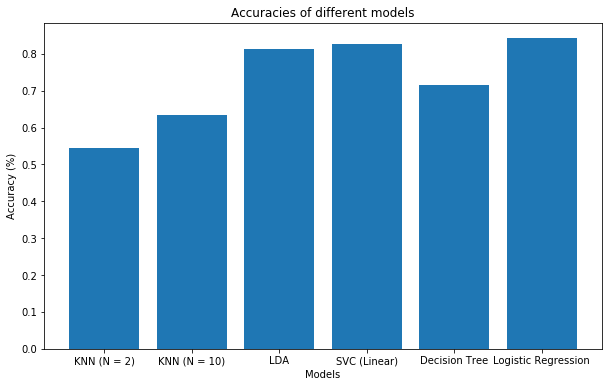

In [11]:
plt.figure(figsize=(10,6))
plt.bar(model_names, result)
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracies of different models")
plt.show()

LDA, SVC, and Logistic Regression models have the highest accuracy on the cross validation set

# Testing different hyperparameters

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


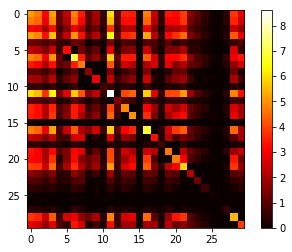

In [12]:
# we got warnings for collinear variables when doing LDA
# this must mean some of our columns (predictors) are correlated 

# get covariance matrix of columns
norm_X = X / X.max(axis=0)
cov = 1/X.shape[1] * norm_X.T @ norm_X
plt.imshow(cov, cmap='hot')
plt.colorbar()
plt.grid('off')

print(clean_df.columns)
# not sure how to interpret this and if we should keep it

# SVC

## Different Models

In [13]:
# models = [SVC(kernel='rbf'), SVC(kernel='linear'),
#           SVC(kernel='poly', degree=2), SVC(kernel='poly', degree=3),
#          SVC(kernel='sigmoid')]
# names = ['Radial basis function', 'Linear', 'Polynomial $n=2$',
#         'Polynomial $n=3$', 'Sigmoid']

# accuracies = []
# for model in models:
#   acc = cross_val_class_accuracy(model, train_data, train_labels, 0.2, 200)
#   accuracies.append(acc)

Linear kernels for SVC has highest accuracy